# Homework 4: Data Visualization
- **Name**:  Manasi Jaykisan Dudhane
- **UB Username**: manasija
- **UB Person Number**:  50547177

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
mydata = pd.read_csv('scatter_data.csv', comment='%', names=['x', 'y'])
mydata

,x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475
...,...,...
95,60.430557,271.013639
96,56.943862,226.411831
97,93.616283,275.939404
98,91.772335,337.474381


In [19]:
x = mydata['x']
y = mydata['y']

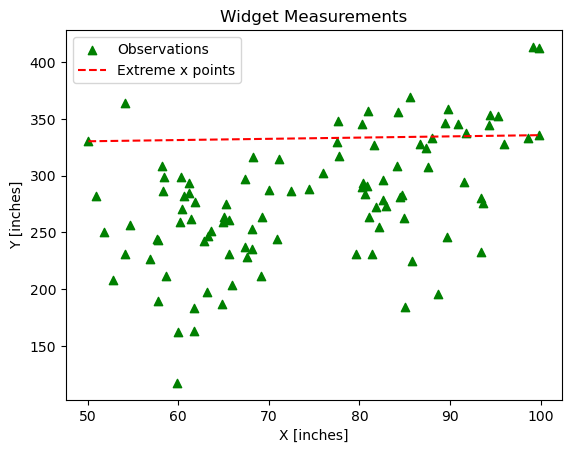

In [20]:
# Plot data points as green triangles
plt.scatter(x, y, marker='^', color='green', label='Observations')

# Find the left-most and right-most points, min, max
leftmost_x = x.min()
rightmost_x = x.max()

# Plot a line from the left-most point to the right-most point
plt.plot([leftmost_x, rightmost_x], [y.loc[x.idxmin()], y.loc[x.idxmax()]], color='red', linestyle='--', label='Extreme x points')

# Add title and labels
plt.title('Widget Measurements')
plt.xlabel('X [inches]')
plt.ylabel('Y [inches]')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [21]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

In [22]:
# It's OK to break up your code into multiple cells.

### Problem 2 - Histogram

In [23]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

In [24]:

data = pd.read_csv('student_grades.csv', comment='%', names=['Student ID', 'Average Score'])
data


,Student ID,Average Score
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249
...,...,...
70,70,64.622963
71,71,86.951039
72,72,85.339374
73,73,69.082293


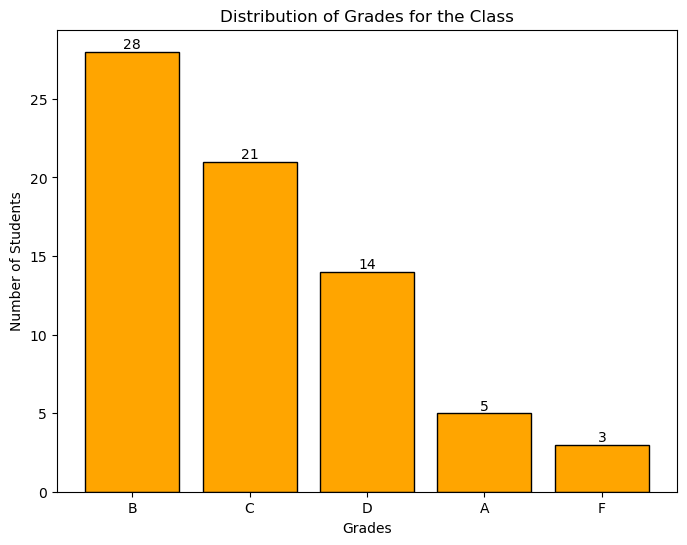

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file, ignoring lines starting with '%'
data = pd.read_csv('student_grades.csv', comment='%', names=['Student ID', 'Average Score'])

# Define a function to calculate grades
def calculate_grade(score):
    if score > 90 and score<=100:
        return "A"
    elif score > 80 and score<=90:
        return "B"
    elif score > 70 and score<=80:
        return "C"
    elif score > 60 and score<=70:
        return "D"
    elif score < 60:
        return "F"

# Apply the calculate_grade function to the 'Average Score' column
data['Grade'] = data['Average Score'].apply(calculate_grade)

# Count the occurrences of each grade
grade_counts = data['Grade'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(grade_counts.index, grade_counts.values, color='orange', edgecolor='black')

# Display counts above the bars
for i, count in enumerate(grade_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Label the axes and add a title
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Distribution of Grades for the Class')

# Display the histogram
plt.show()


In [26]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

In [27]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

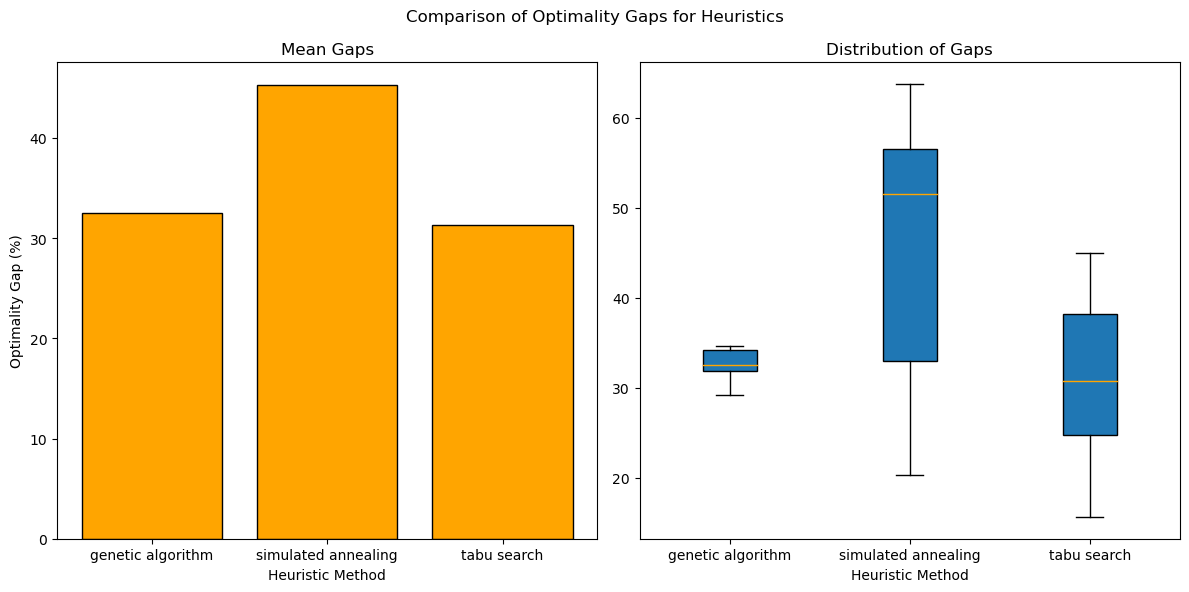

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data_b = pd.read_csv("solution_data.csv", comment="%", header=None)
data_b.columns = ["Problem", "SolnMethod", "Value"]

# Calculate the optimality gaps for each heuristic
optimal_val = data_b[data_b['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristic_val = data_b[data_b['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
optimality_gaps = (optimal_val - heuristic_val) / optimal_val * 100

# Reset the index of the Series
optimality_gaps = optimality_gaps.reset_index()

# Create a DataFrame for the bar plot
barplot_d = pd.DataFrame({
    'Heuristic': optimality_gaps['SolnMethod'],
    'Optimality Gap': optimality_gaps['Value']
})

# Get the average optimality gaps for specific heuristics
optimality_gaps = optimality_gaps.reset_index()
average_gaps = barplot_d[barplot_d['Heuristic'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# First subplot: Barplot of average optimality gaps
axes[0].bar(average_gaps['Heuristic'], average_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")

# Second subplot: Boxplot of spread of optimality gaps
data_boxplot = [optimality_gaps[optimality_gaps['SolnMethod'] == method]['Value'] for method in optimality_gaps['SolnMethod'].unique()]

# Create the boxplot
bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['SolnMethod'].unique(), patch_artist=True, medianprops={'color': 'orange'})

# Set custom labels and positions for the x-axis ticks
custom_labels = optimality_gaps['SolnMethod'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [29]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

 Dataset is about spotify playlist top hits from 2010 to 2022, from this several meaningful correlations among different musical attributes can be made. To visually represent these correlations, we are creating a heatmap. A heatmap is an effective choice for this task because it allows us to display the strength and direction of correlations between multiple variables in a clear and concise manner. In our case, the heatmap will use color intensity to represent the correlation coefficients between pairs of musical attributes.

The heatmap will provide a visual summary of the relationships between these attributes, making it easy to identify patterns and understand the extent of correlations. Using color gradients, we can intuitively interpret the positive (strong correlations in bright colors) and negative (strong correlations in dark colors) relationships, enhancing our understanding of the intricate connections between musical features. This visualization method will help us explore and communicate the complex interdependencies among musical attributes, providing valuable insights into the underlying structure of the dataset.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/many_pairwise_correlations.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/josephinelsy/spotify-top-hit-playlist-2010-2022

In [30]:
# Use "Code" cells to create your plots 
# ...

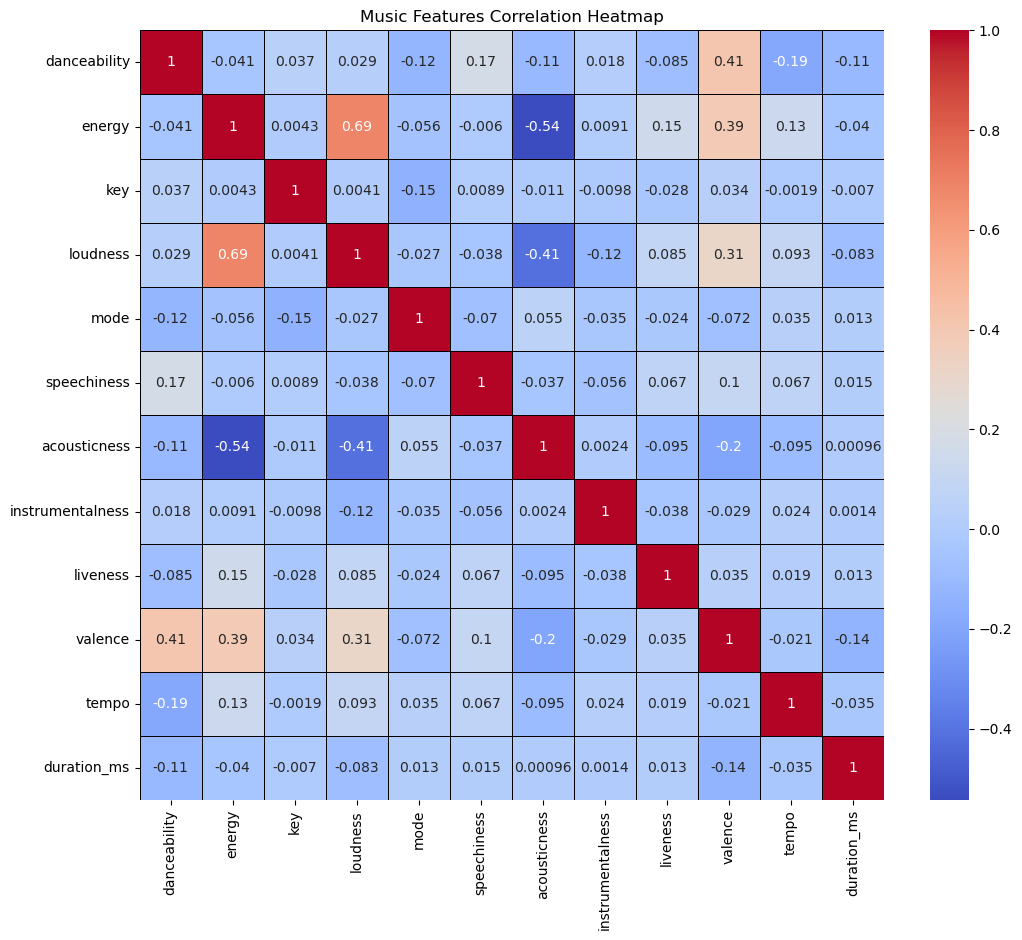

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("playlist_2010to2022.csv")

# Remove rows with missing values
df = df.dropna()

# Select relevant columns and remove unnecessary columns
df1 = df.drop(columns=['playlist_url', 'track_id', 'artist_id', 'artist_genres'])

# Calculate correlation matrix
corrln = df1.iloc[:, 6:18].corr()

# Create a diagonal correlation heatmap with annotations
plt.figure(figsize=(12, 10)) #settingup the size
sns.heatmap(corrln, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', mask=corrln.isnull()) 
plt.title('Music Features Correlation Heatmap')
plt.show()


In our analysis, we observed several noteworthy correlations among musical attributes. Notably, there exists a strong positive correlation (0.69) between Energy and Loudness, indicating that songs with higher energy levels tend to be louder. Conversely, Acousticness and Energy display a moderate negative correlation (-0.54), revealing that acoustic songs generally have lower energy levels. Additionally, there is a moderate negative correlation (-0.41) between Loudness and Acousticness, signifying that louder songs are often less acoustic in nature. In terms of emotional tone, Danceability and Valence exhibit a moderate positive correlation (0.41), suggesting that more danceable songs tend to possess a more positive mood. Similarly, Energy and Valence also show a moderate positive correlation (0.39), indicating that songs with higher energy levels tend to convey a more positive emotional quality. These correlations provide valuable insights into the relationships between different musical attributes, shedding light on the intricate interplay of sound elements within music compositions.